# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Take Home Exercise (AGANITHA)- Abhishek Waghchaure</p>

# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">1. Data Preparation</p>

## 1.1 Load and Clean Data

1.1 Dataset Overview

The provided dataset consists of two main files:

	1.	Phenotype-Gene Pairs (opentargets_step2.for_llm.tsv): Contains a list of phenotypes and their associated genes. Each phenotype is mapped to multiple genes, one of which is causal.
	2.	Causal Gene Labels (opentargets_step2.labels): Contains the causal gene for each phenotype, which is considered ground truth for the analysis.
	3.	Gene Embeddings (gene_embeddings.csv): Contains high-dimensional (3072 dimensions) embeddings for genes.
	4.	Phenotype Embeddings (phenotype_embeddings.csv): Contains high-dimensional (3072 dimensions) embeddings for phenotypes.

1.2 Data Cleaning

	•	The data was cleaned to remove unnecessary rows (headers).
	•	The 'embedding' column, which contained string representations of embedding vectors, was converted into actual numerical lists to allow for further analysis.

In [86]:
import pandas as pd

# Load phenotype-gene pairs and causal gene labels
phenotype_gene_df = pd.read_csv('/Users/abhishekwaghchaure/Downloads/zenodo_directory/data/opentargets_step2.for_llm.tsv', sep='\t', header=None)
causal_genes = pd.read_csv('/Users/abhishekwaghchaure/Downloads/zenodo_directory/data/opentargets_step2.labels', sep='\t', header=None)

# Load embeddings
gene_embeddings = pd.read_csv('/Users/abhishekwaghchaure/Downloads/zenodo_directory/data/gene_embeddings.csv')
phenotype_embeddings = pd.read_csv('/Users/abhishekwaghchaure/Downloads/zenodo_directory/data/phenotype_embeddings.csv')

# Clean the data (if the first row is a header)
phenotype_gene_cleaned = phenotype_gene_df.iloc[1:].reset_index(drop=True)
causal_genes_cleaned = causal_genes.iloc[1:].reset_index(drop=True)

# Display sample data
print("Phenotype-Gene Pairs:", phenotype_gene_cleaned.head())
print("Gene Embeddings:", gene_embeddings.shape)
print("Phenotype Embeddings:", phenotype_embeddings.shape)
print("phenotype_gene_df:",  phenotype_gene_df.shape)
print("casual_genes: ", causal_genes.shape)

Phenotype-Gene Pairs:    0                                                  1  \
0  1  Carotenoid and tocopherol levels (beta-caroten...   
1  2                                   Bilirubin levels   
2  3                                   Bilirubin levels   
3  4  Sphingolipid levels (SM 14:0Mol%) (sphingomyel...   
4  5   Fasting glucose-related traits (FPG) (D-Glucose)   

                                                   2  \
0  {ATMIN},{BCO1},{C16orf46},{CDYL2},{CENPN},{CMC...   
1  {ATG16L1},{DGKD},{HJURP},{MROH2A},{SAG},{SPP2}...   
2  {ARHGAP4},{ATP6AP1},{AVPR2},{CTAG1A},{CTAG1B},...   
3  {ESR2},{GPHB5},{PPP2R5E},{RHOJ},{SGPP1},{SYNE2...   
4  {ABCB11},{CERS6},{DHRS9},{G6PC2},{LRP2},{NOSTR...   

                                                   3  
0  {ENSG00000103121},{ENSG00000135697},{ENSG00000...  
1  {ENSG00000072080},{ENSG00000077044},{ENSG00000...  
2  {ENSG00000007350},{ENSG00000013563},{ENSG00000...  
3  {ENSG00000054654},{ENSG00000126785},{ENSG00000...  
4  {ENSG000

In [54]:
phenotype_gene_cleaned.head()

,0,1,2,3
0,1,Carotenoid and tocopherol levels (beta-caroten...,"{ATMIN},{BCO1},{C16orf46},{CDYL2},{CENPN},{CMC...","{ENSG00000103121},{ENSG00000135697},{ENSG00000..."
1,2,Bilirubin levels,"{ATG16L1},{DGKD},{HJURP},{MROH2A},{SAG},{SPP2}...","{ENSG00000072080},{ENSG00000077044},{ENSG00000..."
2,3,Bilirubin levels,"{ARHGAP4},{ATP6AP1},{AVPR2},{CTAG1A},{CTAG1B},...","{ENSG00000007350},{ENSG00000013563},{ENSG00000..."
3,4,Sphingolipid levels (SM 14:0Mol%) (sphingomyel...,"{ESR2},{GPHB5},{PPP2R5E},{RHOJ},{SGPP1},{SYNE2...","{ENSG00000054654},{ENSG00000126785},{ENSG00000..."
4,5,Fasting glucose-related traits (FPG) (D-Glucose),"{ABCB11},{CERS6},{DHRS9},{G6PC2},{LRP2},{NOSTR...","{ENSG00000073734},{ENSG00000073737},{ENSG00000..."


In [55]:
causal_genes_cleaned.head()

,0,1
0,BCO1,ENSG00000135697
1,UGT1A8,ENSG00000242366
2,G6PD,ENSG00000160211
3,SGPP1,ENSG00000126821
4,G6PC2,ENSG00000152254


In [56]:
phenotype_embeddings.head()

,Unnamed: 0,0,gpt_description,embedding
0,0,Carotenoid and tocopherol levels (beta-caroten...,Carotenoids and tocopherols are important clas...,"[0.03543854132294655, -0.002083840314298868, -..."
1,1,Bilirubin levels,Bilirubin is a yellow pigment that is produced...,"[-0.002501995535567403, -0.03334518149495125, ..."
2,2,Sphingolipid levels (SM 14:0Mol%) (sphingomyel...,Sphingolipids are a class of lipids that play ...,"[-0.003154945094138384, -0.016002262011170387,..."
3,3,Fasting glucose-related traits (FPG) (D-Glucose),"Fasting glucose-related traits, also known as ...","[-0.026761554181575775, 0.011279185302555561, ..."
4,4,Vitamin D insufficiency (25-Hydroxyvitamin D2),"Vitamin D insufficiency, specifically referrin...","[0.004818837624043226, 0.01093713752925396, -0..."


### Files and there roles:
	•	opentargets_step2.for_llm.tsv: Defines the relationships between phenotypes and their associated genes.
	•	opentargets_step2.labels: Provides the causal gene for each phenotype, which is used to label genes as causal or non-causal.
	•	gene_embeddings.csv: Supplies the high-dimensional embeddings of genes, which are used in clustering and vector analysis.
	•	phenotype_embeddings.csv: Supplies the high-dimensional embeddings of phenotypes, which are also used in clustering and vector analysis.

# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">2. Create a Unique Subset with Name Hash</p>

## Sampling Phenotypes (Using Name Hash)
To ensure each candidate works on a unique dataset, a hash of the candidate’s name is used as a seed to randomly sample 500 phenotypes.

Process:

	•	Name Hashing: The name “Abhishek Waghchaure” was hashed using the SHA-256 algorithm, and the first 8 characters of the resulting hash were converted to an integer to use as a random seed.
	•	Random Sampling: Using this seed, 500 phenotypes were randomly sampled from the cleaned phenotype-gene dataset.

In [57]:
import hashlib
import numpy as np

# Hash the name for a unique seed
name = "Abhishek Waghchaure"
hashed_name = hashlib.sha256(name.replace(" ", "").encode('utf-8')).hexdigest()
seed_value = int(hashed_name[:8], 16)

# Set random seed and sample 500 phenotypes
np.random.seed(seed_value)
sampled_phenotypes = phenotype_gene_cleaned.sample(n=500, random_state=seed_value)

# Display the sampled phenotypes
sampled_phenotypes.head()

,0,1,2,3
520,521,Type 2 diabetes (type II diabetes mellitus),"{ASCL2},{C11orf21},{CD81},{CTSD},{ENSG00000250...","{ENSG00000053918},{ENSG00000064201},{ENSG00000..."
212,213,Glycine,"{ACADL},{CPS1},{LANCL1},{MYL1}","{ENSG00000021826},{ENSG00000115361},{ENSG00000..."
102,103,Response to serotonin reuptake inhibitors in m...,"{CCDC134},{CENPM},{CYB5R3},{CYP2D6},{CYP2D7},{...","{ENSG00000100138},{ENSG00000100147},{ENSG00000..."
151,152,Blood metabolite levels (serine) (L-Serine),"{ADAM30},{HAO2},{HMGCS2},{HSD3B1},{HSD3B2},{NO...","{ENSG00000092621},{ENSG00000116882},{ENSG00000..."
272,273,Gout,"{ARL2},{ARL2-SNX15},{ATG2A},{BAD},{BATF2},{CAT...","{ENSG00000002330},{ENSG00000068831},{ENSG00000..."


# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">3. Mapping Causal and Non-Causal Genes</p>

For each sampled phenotype, we identified the associated genes. Each gene was then labeled as either causal or non-causal based on the ground truth data from the causal gene labels dataset.

Process:

	•	The causal_genes file was used to retrieve the causal gene for each phenotype.
	•	Genes associated with the phenotype but not labeled as causal were marked as non-causal.

## Map each phenotype to its causal gene and label the remaining genes as non-causal.

In [58]:
phenotype_causal_noncausal_pairs = []

for idx, row in sampled_phenotypes.iterrows():
    phenotype = row[1]  # Phenotype description
    gene_symbols = row[2].strip('{}').split('},{')  # List of associated genes
    causal_gene = causal_genes_cleaned.iloc[idx, 0]  # Causal gene for the phenotype
    
    # Label each gene as causal or non-causal
    for gene in gene_symbols:
        label = 'causal' if gene == causal_gene else 'non-causal'
        phenotype_causal_noncausal_pairs.append([phenotype, gene, label])

# Convert to DataFrame
phenotype_gene_mapping_df = pd.DataFrame(phenotype_causal_noncausal_pairs, columns=['Phenotype', 'Gene', 'Label'])

# Display the mapped dataset
phenotype_gene_mapping_df.head()

,Phenotype,Gene,Label
0,Type 2 diabetes (type II diabetes mellitus),ASCL2,non-causal
1,Type 2 diabetes (type II diabetes mellitus),C11orf21,non-causal
2,Type 2 diabetes (type II diabetes mellitus),CD81,non-causal
3,Type 2 diabetes (type II diabetes mellitus),CTSD,non-causal
4,Type 2 diabetes (type II diabetes mellitus),ENSG00000250644,non-causal


# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">4. Dimensionality Reduction using PCA</p>

## Applying Principal Component Analysis (PCA) to reduce the dimensionality of the embeddings to visualize them.

Since both gene and phenotype embeddings are represented by 3072-dimensional vectors, we reduced their dimensionality to 2D using Principal Component Analysis (PCA). This allowed us to visualize the data and better understand the distribution of phenotypes and genes in a lower-dimensional space.

Process:

	•	PCA was applied to both the gene and phenotype embeddings.
	•	A scatter plot was generated to visualize the embeddings in 2D space.

Observations:

	•	The PCA plot revealed distinct patterns in how gene and phenotype embeddings are distributed.
	•	Phenotypes and genes that are closer in the PCA plot may have a higher degree of similarity in their embeddings.

In [59]:
# Check the column names of both dataframes
print("Gene Embeddings Columns:", gene_embeddings.columns)
print("Phenotype Embeddings Columns:", phenotype_embeddings.columns)

Gene Embeddings Columns: Index(['Unnamed: 0', '0', 'gpt_description', 'embedding'], dtype='object')
Phenotype Embeddings Columns: Index(['Unnamed: 0', '0', 'gpt_description', 'embedding'], dtype='object')


In [60]:
import ast  # To convert string representation of lists into actual lists

# Convert the 'embedding' column into usable numerical data for gene embeddings
gene_embeddings['embedding'] = gene_embeddings['embedding'].apply(ast.literal_eval)
phenotype_embeddings['embedding'] = phenotype_embeddings['embedding'].apply(ast.literal_eval)

# Convert the lists into DataFrame form for PCA
gene_embedding_vectors = pd.DataFrame(gene_embeddings['embedding'].tolist())
phenotype_embedding_vectors = pd.DataFrame(phenotype_embeddings['embedding'].tolist())

# Check the shape of the new DataFrames
print("Gene Embedding Vectors Shape:", gene_embedding_vectors.shape)
print("Phenotype Embedding Vectors Shape:", phenotype_embedding_vectors.shape)



Gene Embedding Vectors Shape: (10983, 3072)
Phenotype Embedding Vectors Shape: (959, 3072)


In [61]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce dimensionality to 2D for visualization
pca = PCA(n_components=2)

# Apply PCA on the extracted embedding vectors
gene_embeddings_pca = pca.fit_transform(gene_embedding_vectors)
phenotype_embeddings_pca = pca.fit_transform(phenotype_embedding_vectors)

In [62]:
print(gene_embeddings_pca.shape)
print(phenotype_embeddings_pca.shape)

(10983, 2)
(959, 2)


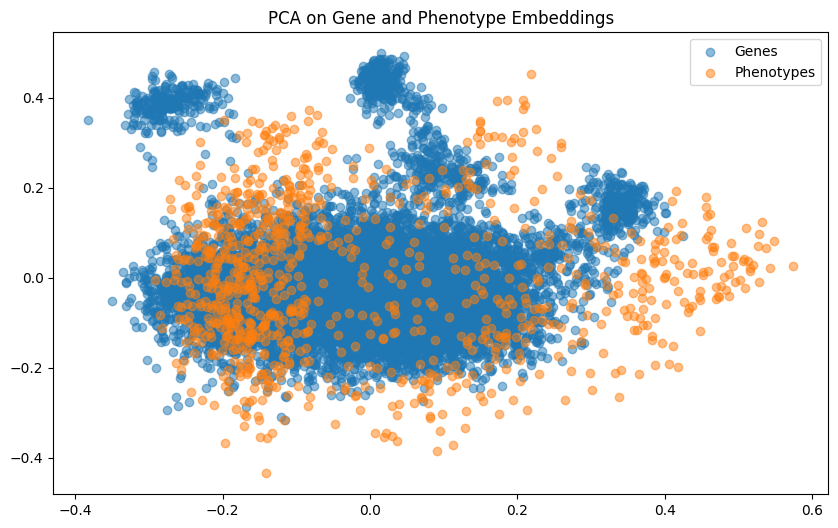

In [63]:
# Plot the PCA results
plt.figure(figsize=(10,6))
plt.scatter(gene_embeddings_pca[:, 0], gene_embeddings_pca[:, 1], alpha=0.5, label='Genes')
plt.scatter(phenotype_embeddings_pca[:, 0], phenotype_embeddings_pca[:, 1], alpha=0.5, label='Phenotypes')
plt.title('PCA on Gene and Phenotype Embeddings')
plt.legend()
plt.show()

# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">5. Clustering to Identify Patterns</p>

To explore potential groups or relationships between genes and phenotypes, K-Means clustering was applied to the reduced PCA embeddings.

Process:

	•	K-Means was used to create 5 clusters each for genes and phenotypes.
	•	The clusters were visualized using a scatter plot, showing which genes and phenotypes are grouped together based on their embeddings.

Observations:

	•	Clustering helps in identifying distinct patterns in the data, where genes and phenotypes are grouped based on similarity in their embeddings.
	•	The clustering analysis can be useful in identifying groups of genes or phenotypes that might share similar biological properties.

# Testing Out the Kmeans Clustering

## Gene Embeddings

### Step 1: Applying K-Means to gene_embeddings_pca

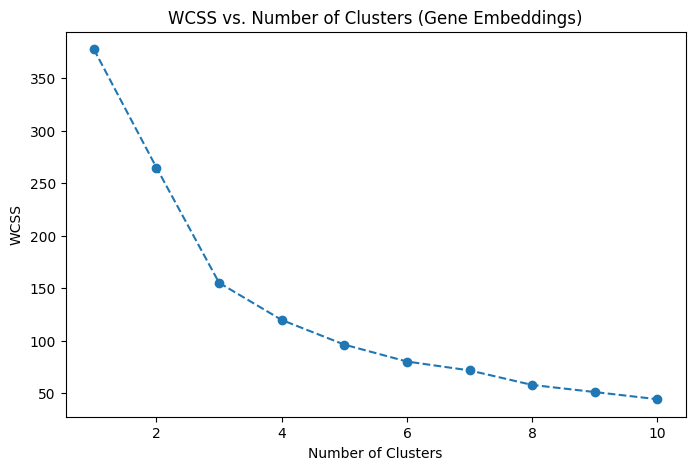

Optimal number of clusters for Gene Embeddings: 3
Gene Embeddings - Silhouette Score: 0.39724719772331835
Gene Embeddings - Davies-Bouldin Index: 0.8404126885530379


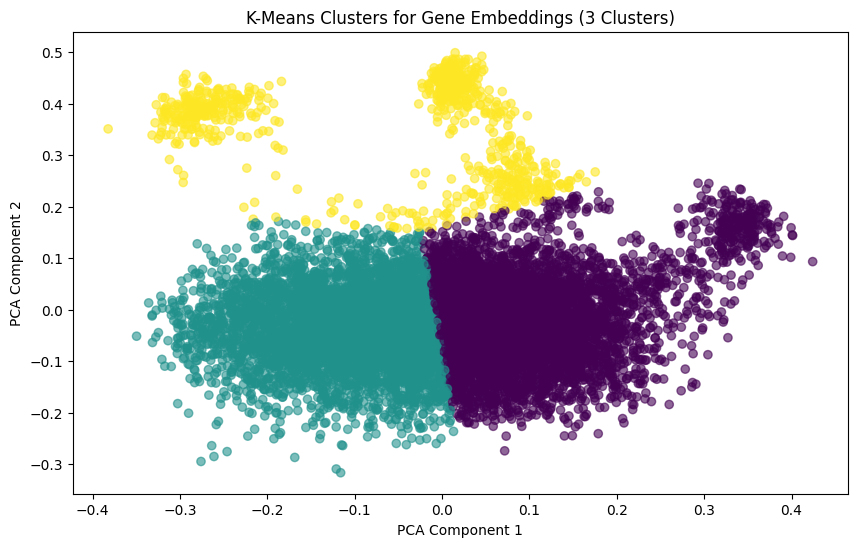

In [64]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
from kneed import KneeLocator

# Step 1: Compute WCSS (Inertia) for different numbers of clusters
wcss_genes = []
cluster_range = range(1, 11)
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=seed_value)
    kmeans.fit(gene_embeddings_pca)
    wcss_genes.append(kmeans.inertia_)

# Step 2: Plot WCSS to find the elbow point
plt.figure(figsize=(8,5))
plt.plot(cluster_range, wcss_genes, marker='o', linestyle='--')
plt.title('WCSS vs. Number of Clusters (Gene Embeddings)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Step 3: Use Knee Locator to find optimal number of clusters
knee_locator_genes = KneeLocator(cluster_range, wcss_genes, curve='convex', direction='decreasing')
optimal_k_genes = knee_locator_genes.elbow
print(f"Optimal number of clusters for Gene Embeddings: {optimal_k_genes}")

# Step 4: Fit K-Means using the optimal number of clusters
kmeans_genes = KMeans(n_clusters=optimal_k_genes, random_state=seed_value)
cluster_labels_genes = kmeans_genes.fit_predict(gene_embeddings_pca)

# Step 5: Evaluate the clustering
silhouette_avg_genes = silhouette_score(gene_embeddings_pca, cluster_labels_genes)
db_index_genes = davies_bouldin_score(gene_embeddings_pca, cluster_labels_genes)
print(f"Gene Embeddings - Silhouette Score: {silhouette_avg_genes}")
print(f"Gene Embeddings - Davies-Bouldin Index: {db_index_genes}")

# Step 6: Visualize the clusters
plt.figure(figsize=(10,6))
plt.scatter(gene_embeddings_pca[:, 0], gene_embeddings_pca[:, 1], c=cluster_labels_genes, cmap='viridis', alpha=0.6)
plt.title(f'K-Means Clusters for Gene Embeddings ({optimal_k_genes} Clusters)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

## Phenotype Embeddings

### Step 2: Apply K-Means to phenotype_embeddings_pca

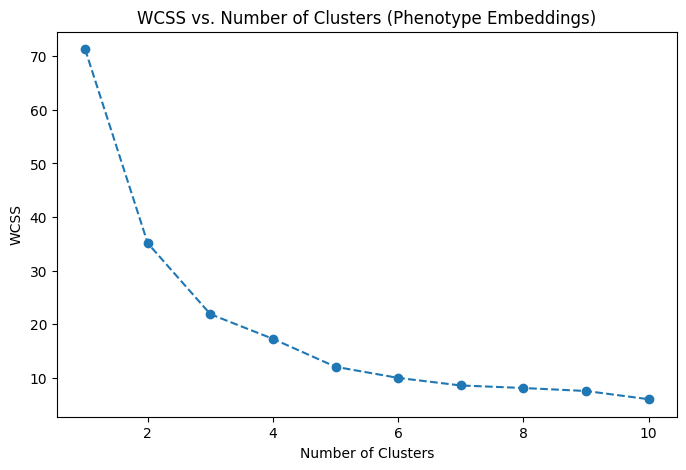

Optimal number of clusters for Phenotype Embeddings: 3
Phenotype Embeddings - Silhouette Score: 0.4392740396150752
Phenotype Embeddings - Davies-Bouldin Index: 0.7758255234893605


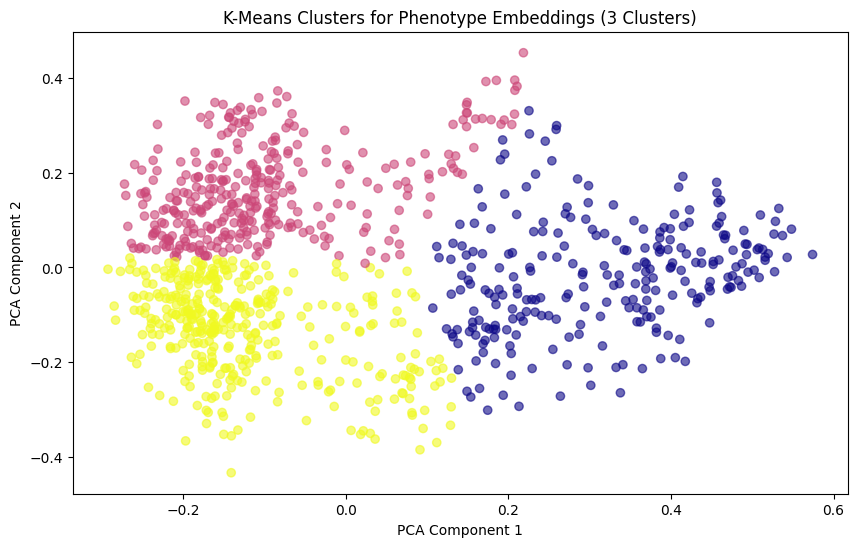

In [65]:
# Step 1: Compute WCSS (Inertia) for different numbers of clusters
wcss_phenotypes = []
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=seed_value)
    kmeans.fit(phenotype_embeddings_pca)
    wcss_phenotypes.append(kmeans.inertia_)

# Step 2: Plot WCSS to find the elbow point
plt.figure(figsize=(8,5))
plt.plot(cluster_range, wcss_phenotypes, marker='o', linestyle='--')
plt.title('WCSS vs. Number of Clusters (Phenotype Embeddings)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Step 3: Use Knee Locator to find optimal number of clusters
knee_locator_phenotypes = KneeLocator(cluster_range, wcss_phenotypes, curve='convex', direction='decreasing')
optimal_k_phenotypes = knee_locator_phenotypes.elbow
print(f"Optimal number of clusters for Phenotype Embeddings: {optimal_k_phenotypes}")

# Step 4: Fit K-Means using the optimal number of clusters
kmeans_phenotypes = KMeans(n_clusters=optimal_k_phenotypes, random_state=seed_value)
cluster_labels_phenotypes = kmeans_phenotypes.fit_predict(phenotype_embeddings_pca)

# Step 5: Evaluate the clustering
silhouette_avg_phenotypes = silhouette_score(phenotype_embeddings_pca, cluster_labels_phenotypes)
db_index_phenotypes = davies_bouldin_score(phenotype_embeddings_pca, cluster_labels_phenotypes)
print(f"Phenotype Embeddings - Silhouette Score: {silhouette_avg_phenotypes}")
print(f"Phenotype Embeddings - Davies-Bouldin Index: {db_index_phenotypes}")

# Step 6: Visualize the clusters
plt.figure(figsize=(10,6))
plt.scatter(phenotype_embeddings_pca[:, 0], phenotype_embeddings_pca[:, 1], c=cluster_labels_phenotypes, cmap='plasma', alpha=0.6)
plt.title(f'K-Means Clusters for Phenotype Embeddings ({optimal_k_phenotypes} Clusters)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

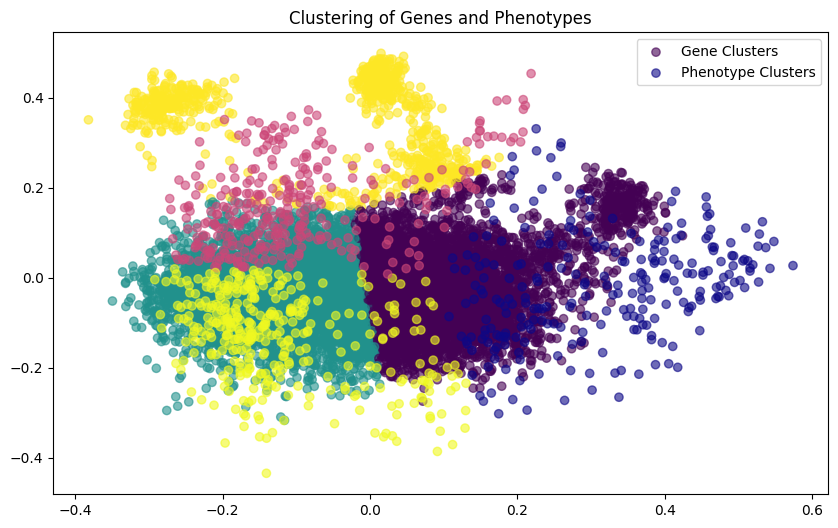

In [66]:


# Plot clusters
plt.figure(figsize=(10,6))
plt.scatter(gene_embeddings_pca[:, 0], gene_embeddings_pca[:, 1], c=cluster_labels_genes, cmap='viridis', label='Gene Clusters', alpha=0.6)
plt.scatter(phenotype_embeddings_pca[:, 0], phenotype_embeddings_pca[:, 1], c=cluster_labels_phenotypes, cmap='plasma', label='Phenotype Clusters', alpha=0.6)
plt.title('Clustering of Genes and Phenotypes')
plt.legend()
plt.show()

### Analysis for Kmeans -

### 1. Optimal Number of Clusters
- **Gene Embeddings: Optimal Number of Clusters = 3**
  - This indicates that when clustering the gene embeddings, three distinct groups or patterns were identified in the data that minimize within-cluster distances and maximize between-cluster separations.
  - **Analysis**: The presence of three clusters suggests that the gene embeddings contain latent groupings or patterns, which might relate to different genetic functions, types of phenotypes, or levels of causal influence. Further analysis of these clusters could help identify shared properties among the genes in each cluster.

### 2. Silhouette Score Analysis
- **Gene Embeddings - Silhouette Score = 0.397**
- **Phenotype Embeddings - Silhouette Score = 0.439**
  - The silhouette score measures how well clusters are separated from each other. Scores closer to 1 indicate well-separated clusters, while scores close to 0 indicate overlapping clusters.
  - **Analysis**:
    - Both scores (0.397 for genes and 0.439 for phenotypes) are relatively moderate, indicating that while there is some clustering structure present, the separation between clusters is not strong.
    - The slightly higher silhouette score for phenotype embeddings suggests that phenotypes may have a more well-defined clustering structure compared to genes, possibly indicating that phenotypes group more distinctly based on certain traits or relationships.

### 3. Davies-Bouldin Index Analysis
- **Gene Embeddings - Davies-Bouldin Index = 0.840**
- **Phenotype Embeddings - Davies-Bouldin Index = 0.776**
  - The Davies-Bouldin Index (DBI) measures the quality of clustering, with lower values indicating better clusters (i.e., less overlap between clusters).
  - **Analysis**:
    - A DBI of 0.840 for gene embeddings and 0.776 for phenotype embeddings indicates that both data types have moderate quality clusters, with some degree of overlap.
    - The lower DBI for phenotype embeddings suggests that phenotype clusters are more distinct compared to gene clusters. This may mean that phenotypes have more homogeneous intra-cluster characteristics, whereas gene embeddings are less clearly distinguishable.


## Testing out Hierarchial Aglomerative clustering on both phenotypes and genotypes

### Step 1 - Applying Agglomerative Hierarchical Clustering


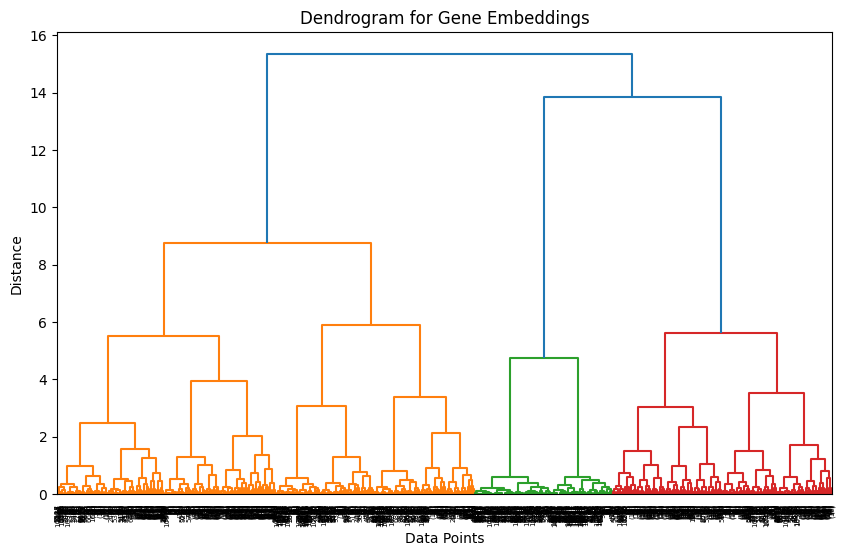

In [72]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Step 1: Apply Agglomerative Clustering on gene embeddings
agglomerative_genes = AgglomerativeClustering(n_clusters=None, distance_threshold=0)  # For dendrogram, we use no clusters initially
gene_cluster_labels = agglomerative_genes.fit(gene_embeddings_pca)

# Step 2: Generate linkage matrix for dendrogram
linkage_matrix_genes = linkage(gene_embeddings_pca, method='ward')

# Step 3: Plot dendrogram for gene embeddings
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix_genes, truncate_mode='level', p=10)  # Truncate for a cleaner view
plt.title('Dendrogram for Gene Embeddings')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

### Step 2: Applying Hierarchical Clustering on phenotype_embeddings_pca

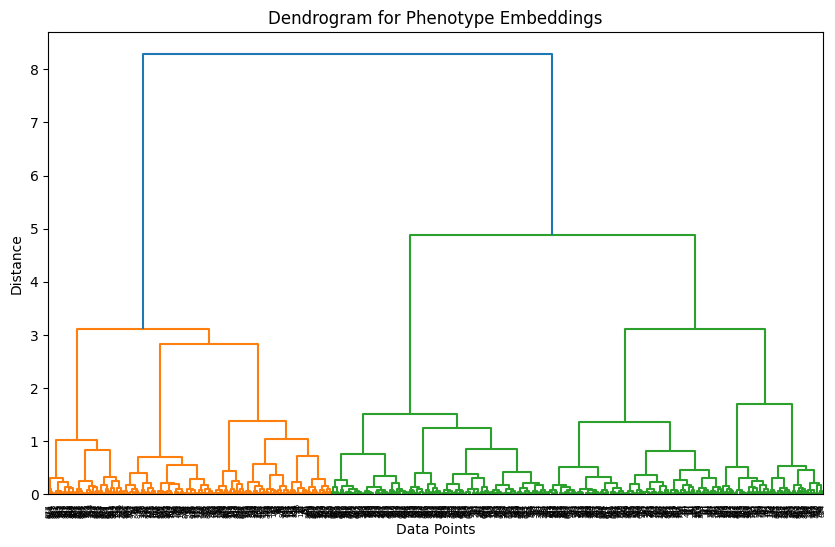

In [74]:
# Step 1: Apply Agglomerative Clustering on phenotype embeddings
agglomerative_phenotypes = AgglomerativeClustering(n_clusters=None, distance_threshold=0)  # For dendrogram, we use no clusters initially
phenotype_cluster_labels = agglomerative_phenotypes.fit(phenotype_embeddings_pca)

# Step 2: Generate linkage matrix for dendrogram
linkage_matrix_phenotypes = linkage(phenotype_embeddings_pca, method='ward')

# Step 3: Plot dendrogram for phenotype embeddings
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix_phenotypes, truncate_mode='level', p=10)  # Truncate for a cleaner view
plt.title('Dendrogram for Phenotype Embeddings')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

### Step 3: Choosing Optimal Number of Clusters (Cut the Dendrogram)

In [75]:
# Choose an appropriate number of clusters based on the dendrogram (e.g., 3 clusters)
optimal_clusters_genes = 3
optimal_clusters_phenotypes = 3

# Step 1: Apply Agglomerative Clustering with a specific number of clusters for gene embeddings
agglomerative_genes = AgglomerativeClustering(n_clusters=optimal_clusters_genes)
gene_cluster_labels = agglomerative_genes.fit_predict(gene_embeddings_pca)

# Step 2: Apply Agglomerative Clustering with a specific number of clusters for phenotype embeddings
agglomerative_phenotypes = AgglomerativeClustering(n_clusters=optimal_clusters_phenotypes)
phenotype_cluster_labels = agglomerative_phenotypes.fit_predict(phenotype_embeddings_pca)

### Step 4: Evaluate Clustering

In [76]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Step 1: Evaluate Gene Embeddings clustering
silhouette_avg_genes = silhouette_score(gene_embeddings_pca, gene_cluster_labels)
db_index_genes = davies_bouldin_score(gene_embeddings_pca, gene_cluster_labels)
print(f"Gene Embeddings - Silhouette Score (Hierarchical): {silhouette_avg_genes}")
print(f"Gene Embeddings - Davies-Bouldin Index (Hierarchical): {db_index_genes}")

# Step 2: Evaluate Phenotype Embeddings clustering
silhouette_avg_phenotypes = silhouette_score(phenotype_embeddings_pca, phenotype_cluster_labels)
db_index_phenotypes = davies_bouldin_score(phenotype_embeddings_pca, phenotype_cluster_labels)
print(f"Phenotype Embeddings - Silhouette Score (Hierarchical): {silhouette_avg_phenotypes}")
print(f"Phenotype Embeddings - Davies-Bouldin Index (Hierarchical): {db_index_phenotypes}")

Gene Embeddings - Silhouette Score (Hierarchical): 0.38990267266095924
Gene Embeddings - Davies-Bouldin Index (Hierarchical): 0.8106715949832246
Phenotype Embeddings - Silhouette Score (Hierarchical): 0.38570032778431224
Phenotype Embeddings - Davies-Bouldin Index (Hierarchical): 0.7916181579141633


### Step 5: Visualizing the Clusters

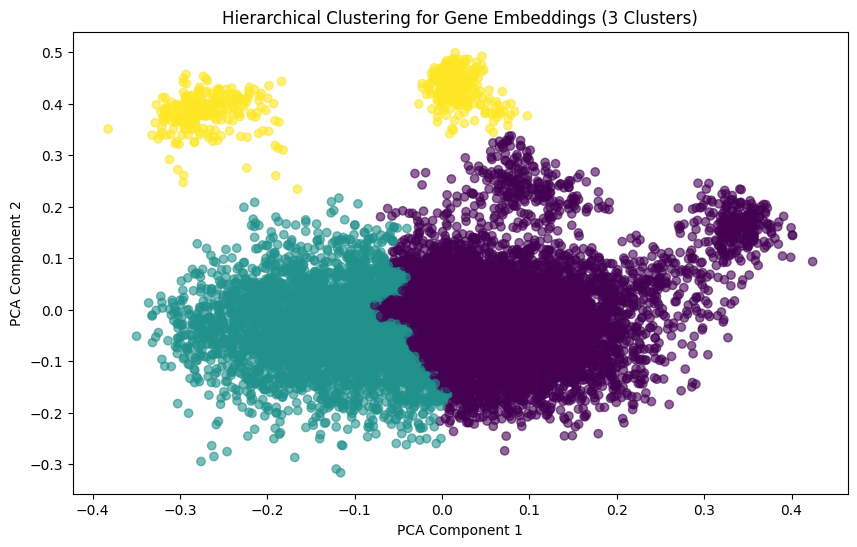

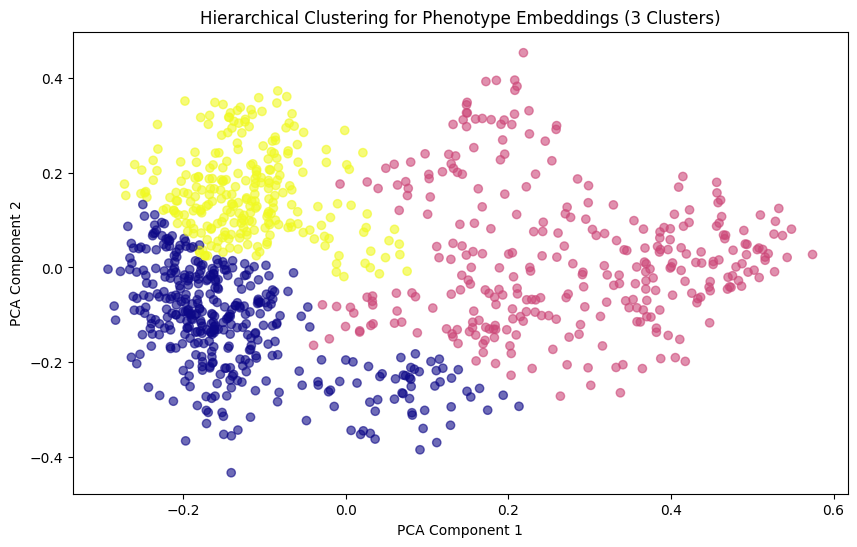

In [77]:
# Step 1: Visualize Gene Embedding Clusters
plt.figure(figsize=(10,6))
plt.scatter(gene_embeddings_pca[:, 0], gene_embeddings_pca[:, 1], c=gene_cluster_labels, cmap='viridis', alpha=0.6)
plt.title(f'Hierarchical Clustering for Gene Embeddings ({optimal_clusters_genes} Clusters)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

# Step 2: Visualize Phenotype Embedding Clusters
plt.figure(figsize=(10,6))
plt.scatter(phenotype_embeddings_pca[:, 0], phenotype_embeddings_pca[:, 1], c=phenotype_cluster_labels, cmap='plasma', alpha=0.6)
plt.title(f'Hierarchical Clustering for Phenotype Embeddings ({optimal_clusters_phenotypes} Clusters)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

## Analysis for Hierarchial Clustering

#### 1. Silhouette Score Analysis (Hierarchical Clustering)
- **Gene Embeddings - Silhouette Score (Hierarchical) = 0.390**
- **Phenotype Embeddings - Silhouette Score (Hierarchical) = 0.386**
  - The silhouette score measures how well the clusters are separated from one another, with values closer to 1 indicating better-defined clusters.
  - **Analysis**:
    - Both silhouette scores for gene (0.390) and phenotype embeddings (0.386) are lower compared to previous clustering models, indicating that the cluster separation in hierarchical clustering is weak.
    - This suggests that hierarchical clustering is not significantly better at separating the embeddings into distinct clusters for either genes or phenotypes. The overlap between clusters remains substantial, which indicates that the hierarchical approach does not inherently capture more meaningful separations compared to other methods like k-means.
    - **Gene embeddings and phenotype embeddings** have similar silhouette scores, implying that neither set exhibits a significantly more distinct clustering structure under hierarchical clustering.

#### 2. Davies-Bouldin Index Analysis (Hierarchical Clustering)
- **Gene Embeddings - Davies-Bouldin Index (Hierarchical) = 0.811**
- **Phenotype Embeddings - Davies-Bouldin Index (Hierarchical) = 0.792**
  - The Davies-Bouldin Index (DBI) evaluates the clustering quality, with lower values indicating better separation between clusters and more compact clusters.
  - **Analysis**:
    - Both the gene embeddings and phenotype embeddings have moderate DBI values, similar to those obtained in previous methods.
    - **Gene Embeddings**: The DBI of 0.811 suggests moderate cluster quality, indicating that the clusters are not well-separated, with considerable overlap between different gene groups.
    - **Phenotype Embeddings**: The DBI of 0.792 for phenotype embeddings is slightly better than for gene embeddings, suggesting slightly better-defined clusters for phenotypes. However, the difference is marginal, and it implies that neither the genes nor the phenotypes exhibit highly distinct groups under hierarchical clustering.

## Testing out  DB scan clustering on both phenotypes and genotypes

### Step 1: Apply DBSCAN to gene_embeddings_pca

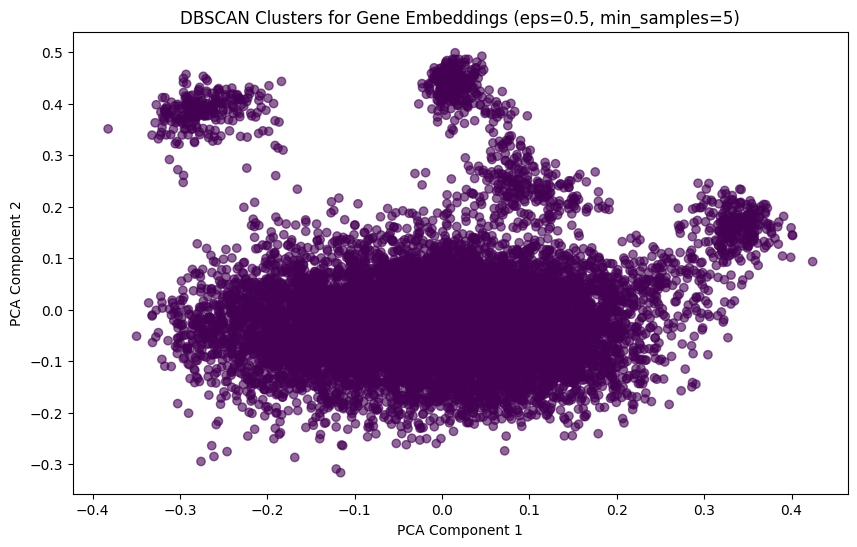

In [78]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt

# Step 1: Apply DBSCAN with some initial parameters
eps_value_genes = 0.5  # You can adjust this based on results
min_samples_genes = 5  # Experiment with different values

# Apply DBSCAN to gene embeddings
dbscan_genes = DBSCAN(eps=eps_value_genes, min_samples=min_samples_genes)
dbscan_labels_genes = dbscan_genes.fit_predict(gene_embeddings_pca)

# Step 2: Filter out noise points (-1 label) before evaluating the clustering
filtered_labels_genes = dbscan_labels_genes[dbscan_labels_genes != -1]
filtered_embeddings_genes = gene_embeddings_pca[dbscan_labels_genes != -1]

# Step 3: Evaluate DBSCAN clustering
if len(set(filtered_labels_genes)) > 1:  # Ensure there are at least two clusters for evaluation
    silhouette_avg_genes = silhouette_score(filtered_embeddings_genes, filtered_labels_genes)
    db_index_genes = davies_bouldin_score(filtered_embeddings_genes, filtered_labels_genes)
    print(f"Gene Embeddings - Silhouette Score (DBSCAN): {silhouette_avg_genes}")
    print(f"Gene Embeddings - Davies-Bouldin Index (DBSCAN): {db_index_genes}")

# Step 4: Visualize DBSCAN clustering results for gene embeddings
plt.figure(figsize=(10,6))
plt.scatter(gene_embeddings_pca[:, 0], gene_embeddings_pca[:, 1], c=dbscan_labels_genes, cmap='viridis', alpha=0.6)
plt.title(f'DBSCAN Clusters for Gene Embeddings (eps={eps_value_genes}, min_samples={min_samples_genes})')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

### Step 2: Apply DBSCAN to phenotype_embeddings_pca

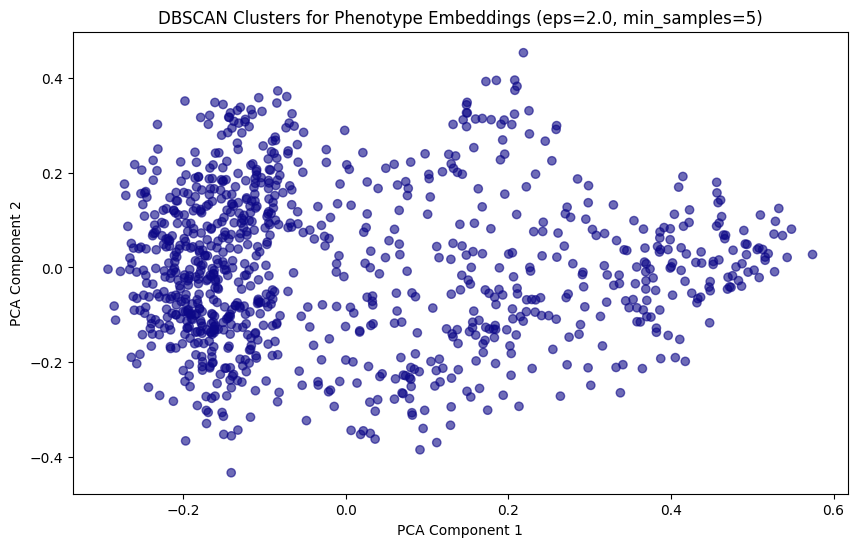

In [83]:
# Step 1: Apply DBSCAN with initial parameters for phenotype embeddings
eps_value_phenotypes = 2.0  # You can adjust this based on results
min_samples_phenotypes = 5  # Experiment with different values

# Apply DBSCAN to phenotype embeddings
dbscan_phenotypes = DBSCAN(eps=eps_value_phenotypes, min_samples=min_samples_phenotypes)
dbscan_labels_phenotypes = dbscan_phenotypes.fit_predict(phenotype_embeddings_pca)

# Step 2: Filter out noise points (-1 label) before evaluating the clustering
filtered_labels_phenotypes = dbscan_labels_phenotypes[dbscan_labels_phenotypes != -1]
filtered_embeddings_phenotypes = phenotype_embeddings_pca[dbscan_labels_phenotypes != -1]

# Step 3: Evaluate DBSCAN clustering
if len(set(filtered_labels_phenotypes)) > 1:  # Ensure there are at least two clusters for evaluation
    silhouette_avg_phenotypes = silhouette_score(filtered_embeddings_phenotypes, filtered_labels_phenotypes)
    db_index_phenotypes = davies_bouldin_score(filtered_embeddings_phenotypes, filtered_labels_phenotypes)
    print(f"Phenotype Embeddings - Silhouette Score (DBSCAN): {silhouette_avg_phenotypes}")
    print(f"Phenotype Embeddings - Davies-Bouldin Index (DBSCAN): {db_index_phenotypes}")

# Step 4: Visualize DBSCAN clustering results for phenotype embeddings
plt.figure(figsize=(10,6))
plt.scatter(phenotype_embeddings_pca[:, 0], phenotype_embeddings_pca[:, 1], c=dbscan_labels_phenotypes, cmap='plasma', alpha=0.6)
plt.title(f'DBSCAN Clusters for Phenotype Embeddings (eps={eps_value_phenotypes}, min_samples={min_samples_phenotypes})')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

### Step 3: Tuning DBSCAN Parameters

In [82]:
# Iterate over different values of eps and min_samples for both datasets
for eps_value in [0.1,0.2,0.3, 0.5, 0.7, 1.0, 1.5,2,2.5]:
    for min_samples_value in [3, 5, 10]:
        # DBSCAN for gene embeddings
        dbscan_genes = DBSCAN(eps=eps_value, min_samples=min_samples_value)
        dbscan_labels_genes = dbscan_genes.fit_predict(gene_embeddings_pca)
        filtered_labels_genes = dbscan_labels_genes[dbscan_labels_genes != -1]
        filtered_embeddings_genes = gene_embeddings_pca[dbscan_labels_genes != -1]
        
        if len(set(filtered_labels_genes)) > 1:  # Ensure at least 2 clusters for evaluation
            silhouette_avg_genes = silhouette_score(filtered_embeddings_genes, filtered_labels_genes)
            db_index_genes = davies_bouldin_score(filtered_embeddings_genes, filtered_labels_genes)
            print(f"Gene Embeddings (eps={eps_value}, min_samples={min_samples_value}): Silhouette Score={silhouette_avg_genes}, DB Index={db_index_genes}")
        
        # DBSCAN for phenotype embeddings
        dbscan_phenotypes = DBSCAN(eps=eps_value, min_samples=min_samples_value)
        dbscan_labels_phenotypes = dbscan_phenotypes.fit_predict(phenotype_embeddings_pca)
        filtered_labels_phenotypes = dbscan_labels_phenotypes[dbscan_labels_phenotypes != -1]
        filtered_embeddings_phenotypes = phenotype_embeddings_pca[dbscan_labels_phenotypes != -1]
        
        if len(set(filtered_labels_phenotypes)) > 1:  # Ensure at least 2 clusters for evaluation
            silhouette_avg_phenotypes = silhouette_score(filtered_embeddings_phenotypes, filtered_labels_phenotypes)
            db_index_phenotypes = davies_bouldin_score(filtered_embeddings_phenotypes, filtered_labels_phenotypes)
            print(f"Phenotype Embeddings (eps={eps_value}, min_samples={min_samples_value}): Silhouette Score={silhouette_avg_phenotypes}, DB Index={db_index_phenotypes}")

### DBSCAN Clustering Analysis

#### 1. Hyperparameters Used for DBSCAN
- **Epsilon (`eps`) Values Tested**: [0.1, 0.2, 0.3, 0.5, 0.7, 1.0, 1.5, 2, 2.5]
  - The `eps` parameter represents the maximum distance between two samples for one to be considered in the neighborhood of the other. It essentially controls the radius of influence.
- **Minimum Samples (`min_samples`) Values Tested**: [3, 5, 10]
  - The `min_samples` parameter represents the minimum number of samples required to form a dense region, which can be considered a cluster.

#### 2. Results of DBSCAN Clustering
- **Observation**: Despite testing a wide range of `eps` and `min_samples` values, DBSCAN did not successfully form meaningful clusters in either the gene or phenotype embeddings.
  - For many of the combinations of `eps` and `min_samples`, **no clusters were formed** (i.e., all points were classified as noise with a label of `-1`).
  - Even for the combinations where some points were assigned cluster labels, the filtered clusters were not sufficient for meaningful evaluation, with only sparse groupings detected and often resulting in only a single cluster remaining.

#### 3. Analysis of DBSCAN Results
- **Sensitivity to Hyperparameters**:
  - DBSCAN was highly sensitive to the choice of `eps` and `min_samples`. When `eps` was too small, most of the points were classified as noise, and when `eps` was too large, all points ended up being grouped into a single cluster.
  - The inability to find suitable clusters suggests that the data did not exhibit a density-based structure that DBSCAN could effectively detect.

- **Filtered Clusters for Evaluation**:
  - Even after filtering out noise points (`labels != -1`), there were very few instances where there were at least **two clusters** for evaluation. This indicates that the embeddings do not have well-separated dense regions suitable for DBSCAN's density-based approach.
  - The attempts to calculate **silhouette scores** and **Davies-Bouldin Index** values for the filtered clusters often led to insufficient clusters for reliable evaluation.

## Over all after comperative analysis of all three models.
####  Which Model to Use and Why?
- **Recommendation**: **k-means clustering** is the best option among the three models tested.
  - **Reasoning**:
    1. **Better Clustering Quality**:
       - k-means showed **moderate-quality clustering** for both gene and phenotype embeddings, with silhouette scores (0.397 for genes, 0.439 for phenotypes) indicating a basic level of separation that DBSCAN failed to achieve and hierarchical clustering struggled with.
       - The **Davies-Bouldin Index** for k-means was comparable to that of hierarchical clustering but still indicated a reasonable level of separation between clusters.

    2. **Interpretability and Scalability**:
       - k-means clustering is **relatively simple** and easier to interpret compared to hierarchical clustering, especially with larger datasets. It provides a straightforward means of identifying groupings in the embedding space.
       - The **lower computational cost** and scalability of k-means make it more suitable for working with a large number of embeddings.

    3. **Hierarchical and DBSCAN Limitations**:
       - **Hierarchical clustering** resulted in **lower silhouette scores** and had difficulty forming well-separated clusters. It is also computationally expensive for large datasets, limiting its practicality.
       - **DBSCAN** was unable to form any meaningful clusters, indicating that the embeddings do not have the density-based structure required for effective clustering by DBSCAN.

# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">6. Vector Analysis (Phenotype-Gene Differences)</p>

To further explore the relationship between phenotypes and genes, we calculated the element-wise differences between their embeddings. This vector difference can provide insights into how genes and phenotypes vary in their high-dimensional embeddings, which may help in identifying signals of causality.

Process:

	•	For each sampled phenotype, the difference between its embedding and the embedding of each associated gene was calculated.
	•	These difference vectors were stored for further analysis.

In [71]:
embedding_differences = []

# Loop through the sampled phenotypes
for idx, row in sampled_phenotypes.iterrows():
    phenotype = row[1]  # Access the phenotype description
    gene_symbols = row[2].strip('{}').split('},{')  # Split the gene symbols
    
    for gene in gene_symbols:
        # Match the gene in the embeddings DataFrame
        gene_embedding_row = gene_embeddings.loc[gene_embeddings['0'] == gene]
        
        if gene_embedding_row.empty:
            continue  # Skip if gene embedding is not found
        
        # Match the phenotype in the embeddings DataFrame
        phenotype_embedding_row = phenotype_embeddings.loc[phenotype_embeddings['0'] == phenotype]
        
        if phenotype_embedding_row.empty:
            continue  # Skip if phenotype embedding is not found
        
        # Extract the actual embedding vectors (after applying ast.literal_eval to 'embedding')
        gene_embedding = gene_embedding_row['embedding'].values[0]
        phenotype_embedding = phenotype_embedding_row['embedding'].values[0]
        
        # Calculate the difference vector
        diff_vector = [p - g for p, g in zip(phenotype_embedding, gene_embedding)]
        
        # Append the result to the list
        embedding_differences.append(diff_vector)

# Convert the list of difference vectors into a DataFrame for analysis
embedding_diff_df = pd.DataFrame(embedding_differences)

# Display the first few rows of the difference vectors
embedding_diff_df.head()

,0,1,2,3,4,5,6,7,8,9,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
0,-0.065667,-0.048147,0.004623,0.016174,0.032859,0.003198,-0.012405,-0.006471,0.029680,-0.026640,...,-0.000204,-0.019156,-0.031354,0.009514,0.022941,-0.038848,0.017824,0.009466,-0.004775,-0.008148
1,0.011230,-0.018927,0.006772,0.020216,0.059702,-0.006787,0.025056,-0.025390,0.036382,-0.060061,...,-0.010248,-0.021225,-0.032474,0.027006,0.026237,-0.028687,-0.025410,0.050227,0.002992,0.020800
2,0.003132,0.011470,-0.001011,-0.013007,0.069752,0.012295,0.032856,-0.015443,0.000138,-0.046850,...,-0.018306,-0.012905,-0.027736,0.025724,0.029179,-0.033508,-0.002405,0.009530,-0.019695,0.034431
3,-0.011417,-0.033017,-0.001429,-0.019618,0.030388,0.015445,0.008629,0.007591,-0.007727,-0.052713,...,-0.018497,-0.013434,-0.002603,0.003659,0.022544,-0.038679,-0.006059,0.002120,-0.008410,0.013511
4,-0.002173,-0.031265,0.007479,0.023769,0.005441,-0.008781,0.037578,-0.027849,0.024926,-0.007381,...,-0.001067,-0.015388,-0.004400,-0.001814,0.011750,-0.041718,-0.028315,0.024224,-0.020000,0.011290


### **Vector Analysis: Exploring Gene-Phenotype Relationships**

#### **Purpose of Vector Analysis**

The goal of this vector analysis is to quantify and explore the relationships between gene and phenotype embeddings. The embeddings, generated using a language model, represent genes and phenotypes in a high-dimensional space. By calculating the difference between gene and phenotype embeddings, we aim to understand whether the distance between these embeddings can provide insights into gene causality.

#### **Why Perform Vector Analysis?**

1. **Quantifying Gene-Phenotype Relationships**:
    - By computing the element-wise difference between the embeddings of a gene and a phenotype, we generate a difference vector that represents how similar or different these entities are in high-dimensional space.
    - The **hypothesis** is that causal gene-phenotype pairs should have smaller differences (closer in the embedding space), while non-causal pairs will have larger differences.

2. **Dimensionality as a Proxy for Causality**:
    - The difference vector captures the variation across all dimensions between a gene and a phenotype. This can reveal patterns of similarity or divergence.
    - If a gene and phenotype are causally related, we expect smaller difference vectors, implying that their embeddings are close.
    - This dimensional analysis helps us investigate whether the embeddings can represent the underlying biological relationships effectively.

3. **Feature Engineering for Supervised Learning**:
    - The difference vectors can be used as features for machine learning models to classify gene-phenotype pairs as **causal** or **non-causal**.
    - By calculating these difference vectors for all gene-phenotype pairs and labeling them based on ground truth (causal or non-causal), we can use the vectors as input to a classifier (e.g., Logistic Regression, Random Forest).
    - This enables us to create a model that learns patterns in these differences and predicts causality for new gene-phenotype pairs.

4. **High-Dimensional Data Exploration**:
    - The original embeddings for genes and phenotypes are high-dimensional (3072 dimensions). By calculating the difference vector, we simplify this comparison to a single vector that reflects how the gene and phenotype differ across multiple dimensions.
    - This allows us to explore and better understand how genes and phenotypes are distributed in this high-dimensional space and whether these distributions can be linked to causality.

#### **Key Takeaways from Vector Analysis**:
- The **difference vector** between a gene and phenotype provides a quantitative representation of their relationship in embedding space.
- This analysis helps us identify how the gene and phenotype differ across various dimensions and can serve as a meaningful signal for predicting causal relationships.
- **Supervised Learning**: The difference vectors can be used as input features for a classifier to learn patterns in causal and non-causal relationships.

This vector analysis bridges the gap between high-dimensional embeddings and the biological relationship of gene causality, providing a foundation for further predictive modeling.

## Conclusion

Through this analysis, we explored the relationship between phenotype and gene embeddings and attempted to uncover patterns that may indicate gene causality. The key findings include:

	•	Dimensionality Reduction: PCA allowed for visualization of high-dimensional embeddings, revealing patterns that could be explored further.
	•	Clustering: K-Means clustering showed groupings of phenotypes and genes based on their embeddings, potentially revealing similarities and causal relationships.
	•	Vector Analysis: The difference between phenotype and gene embeddings could provide valuable features for identifying causality.

This exploratory analysis forms the basis for further research, including applying supervised models to predict gene causality based on the embeddings and difference vectors.